In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [3]:
df = pd.read_csv('imu_clean.csv')

In [29]:
x_str = df.x[0].split(',')[1:-1]
x = [float(i) for i in x_str]
y_str = df.y[0].split(',')[1:-1]
y = [float(i) for i in y_str]

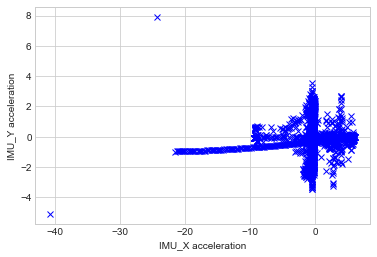

In [64]:
plt.plot(x, y, 'x', color='blue')
plt.xlabel('IMU_X acceleration')
plt.ylabel('IMU_Y acceleration')
plt.show()

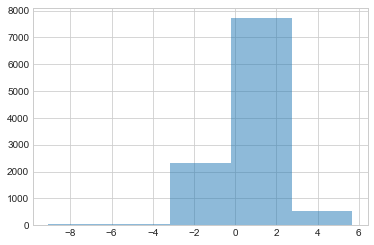

In [65]:
x_out = pd.Series(x)[(x < pd.Series(x).quantile(.99)) & (x > pd.Series(x).quantile(.01))]
ax = plt.hist(x_out,bins=5, alpha=0.5)

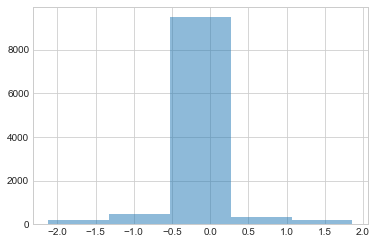

In [66]:
y_out = pd.Series(y)[(y < pd.Series(y).quantile(.99)) & (y > pd.Series(y).quantile(.01))]
ay = plt.hist(y_out,bins=5, alpha=0.5)

## Data Analysis
This is a scatterplot of the IMU_x and IMU_y coordinates of a vehicle making a right turn followed by going straight followed by a left turn.

The IMU data collected shows a section where the y is almost not moving. This shows the vehicle being driven in a straight line where the y acceleration isn't changing. 

There is also a section where the y-acceleration is changing but the x-acceleration is hovering around 0. This is most likely due to the car making a hard turn mostly in the y direction. When y-acceleration is negative the car is turning to the left and when the y-acceleration is positive the vehicle is turning to the right. 

The histograms show that most of the x data resides around -0.5 to 0 meaning not a lot of changes occur in x acceleration. When  you remove the outliers of x you can see that most of the time the car is not really accelerating much in the x direction. This means the vehicle does not change much x-acceleration except when it stops and charges forward indicated by the few coordinates at 1.5 to 3. 

The y histogram shows that the movement of the vehicle was done so in a unimodal matter. The left-ward acceleration is only slightly greater than the right-ward acceleration. This makes sense because when the vehicle turns it turns at a set speed. 

It is also important to notice that there are outliers. These data points are most likely due to errors of recording and are negligible which is why I chose to remove them for the histograms. 